## IMCA - Instituto de Matemática y Ciencias Afines
### Maestría en Modelización Matemática y Computacional
---
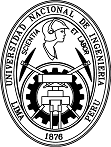
---
# TEMA: PORTAFOLIO DE INVERSION

---

## [1] LECTURA DE DATA 

La data historica descarga de la pagina oficial de la Bolsa de valores de Lima

[Link Bolsa de Valores de Lima](https://www.bvl.com.pe/emisores/listado-emisores)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.random import default_rng
from IPython.display import display

df = pd.read_csv("datos_peru_MSCI.csv", index_col=0, parse_dates=True)
display(df.head())

df.index.min()
df.index.max()
print("Primera fecha Data:", df.index.min())
print("Última fecha Data:", df.index.max())

C:\Users\Usuario\AppData\Local\Temp\ipykernel_12576\304693139.py:7: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv("datos_peru_MSCI.csv", index_col=0, parse_dates=True)


,BAP,SPCCPI1,BUENAVC1,IFS,MINSURI1,INRETC1,CVERDEC1,FERREYC1,CREDITC1,UNACEMC1,...,PODERC1,RIMSEGC1,CASAGRC1,BACKUAC1,NEXAPEC1,AENZAC1,SNJUANC1,CORAREC1,SIDERC1,CARTAVC1
2016-03-31,130.65,16.5,24.66,24.90,1.02,16.10,19.38,1.45,4.32,2.25,...,2.65,1.27,6.73,130.3,2.08,2.74,19.2,0.62,0.220,9.3
2016-04-01,130.70,16.5,24.66,25.84,1.03,16.85,20.40,1.47,4.35,2.25,...,2.65,1.27,7.12,128.0,2.10,2.80,19.2,0.62,0.225,9.3
2016-04-04,127.55,16.5,24.66,25.00,0.95,16.45,20.00,1.45,4.35,2.25,...,2.65,1.27,6.51,128.0,2.02,2.75,19.2,0.62,0.210,9.3
2016-04-05,127.50,16.5,24.66,25.00,0.95,16.20,20.00,1.45,4.35,2.20,...,2.65,1.27,6.50,128.0,2.02,2.80,19.2,0.62,0.188,9.3
2016-04-06,125.88,16.5,24.66,24.58,0.92,16.20,19.99,1.42,4.34,2.10,...,2.31,1.26,6.80,128.0,1.95,2.75,19.2,0.62,0.188,9.3


Primera fecha Data: 2016-03-31 00:00:00
Última fecha Data: 2025-04-03 00:00:00


## [2] ELECCION DE EMPRESAS PARA PORTAFOLIO

Eligiendo datos y periodos para la simulacion. Se usar solo usamos una parte de la data, 4 empresas y un tiempo de un año.

  - Banco de Crédito del Perú S.A.A (CREDITC1)
  - Poderosa S.A.C (PODERC1)
  - Credicorp L.T.D (BAP)
  - Sociedad Minera Cerro Verde S.A.A. (CVERDEC1)


In [3]:
data = df.loc['2023-01-01':'2024-12-31', ['BAP','PODERC1','CREDITC1','CVERDEC1']]
fecha_inicio = data.index[0]
fecha_fin = data.index[-1]

print("Fecha de Analisis:",fecha_inicio," al ", fecha_fin)
print("Datos totales:",len(data)," datos\n")

print(data)


Fecha de Analisis: 2023-01-02 00:00:00  al  2024-12-31 00:00:00
Datos totales: 500  datos

               BAP  PODERC1  CREDITC1  CVERDEC1
2023-01-02  135.25      9.4      2.60     29.80
2023-01-03  135.25      9.4      2.65     29.80
2023-01-04  137.87      9.4      2.65     29.00
2023-01-05  139.47      9.4      2.65     29.00
2023-01-06  142.02      9.4      2.68     29.10
...            ...      ...       ...       ...
2024-12-24  181.00      8.0      4.05     41.00
2024-12-26  182.30      8.0      4.08     40.70
2024-12-27  182.20      8.0      4.00     41.07
2024-12-30  180.85      8.0      4.00     40.70
2024-12-31  180.80      8.0      4.00     40.70

[500 rows x 4 columns]


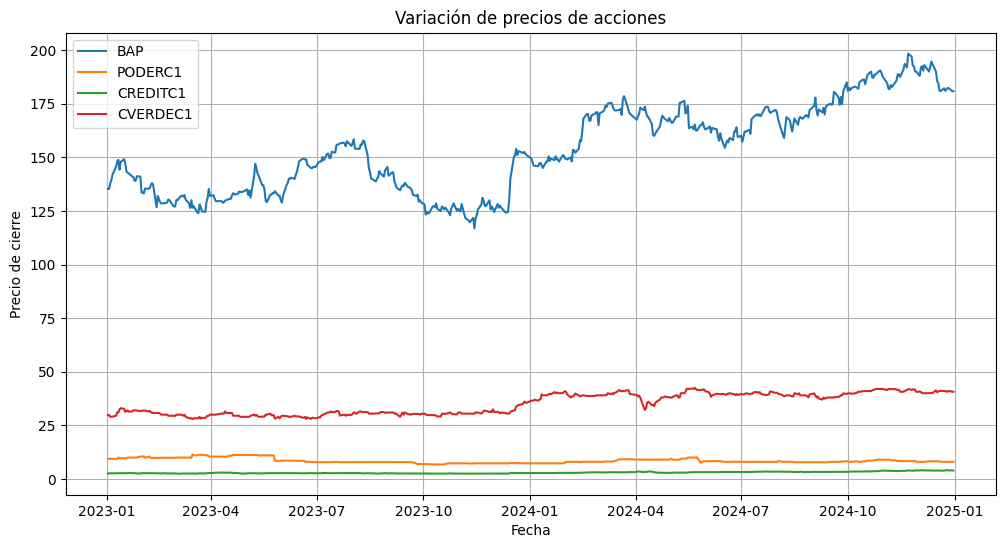

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

#data = df[['BAP','PODERC1','CREDITC1','CVERDEC1']].iloc[-201:-1]

plt.figure(figsize=(12, 6))

for columna in data.columns:
    plt.plot(data.index, data[columna], label=columna)

plt.title("Variación de precios de acciones")
plt.xlabel("Fecha")
plt.ylabel("Precio de cierre")
plt.legend()
plt.grid()
plt.show()


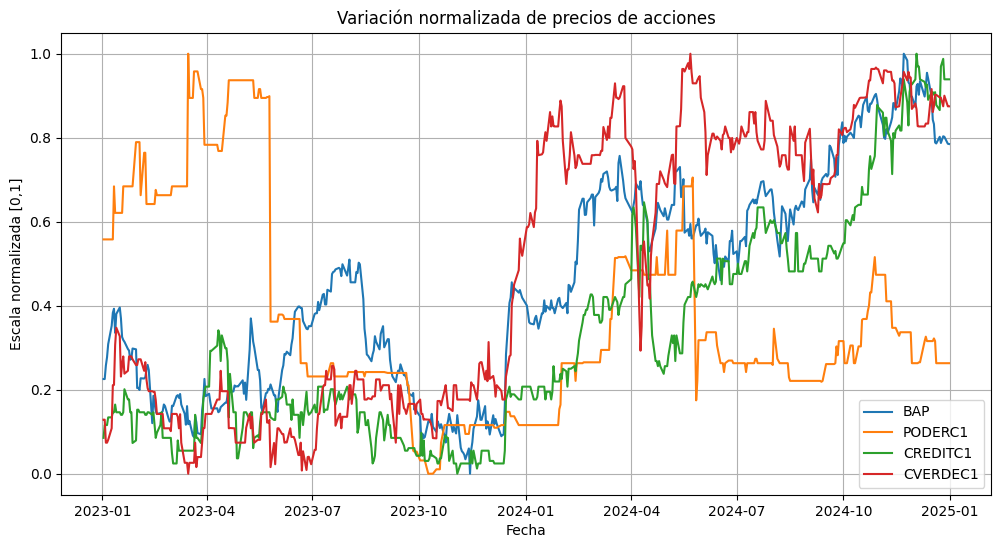

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

#data = df[['BAP','PODERC1','CREDITC1','CVERDEC1']].iloc[-201:-1]

# Normalización SOLO para ploteo
data_norm = (data - data.min()) / (data.max() - data.min())

plt.figure(figsize=(12, 6))

for columna in data_norm.columns:
    plt.plot(data_norm.index, data_norm[columna], label=columna)

plt.title("Variación normalizada de precios de acciones")
plt.xlabel("Fecha")
plt.ylabel("Escala normalizada [0,1]")
plt.legend()
plt.grid()
plt.show()


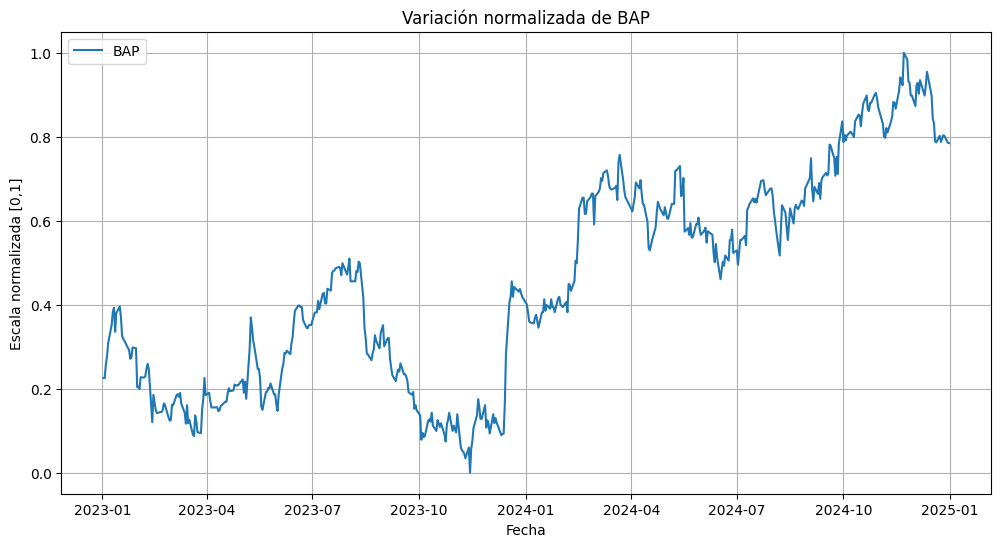

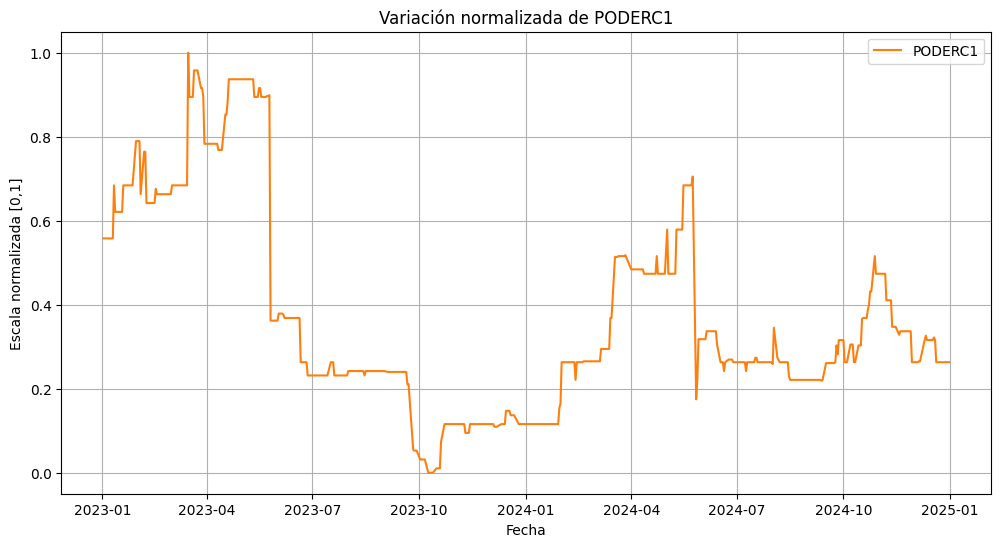

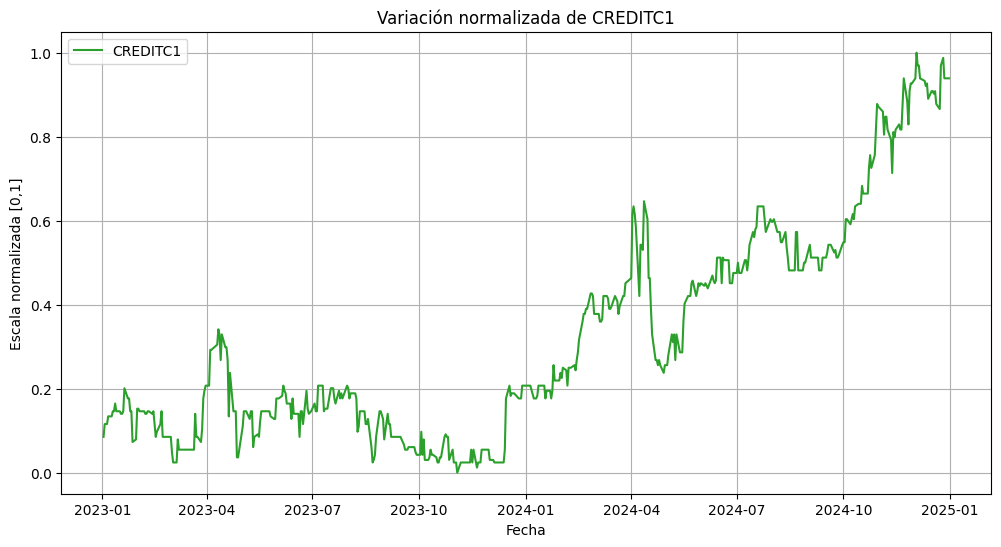

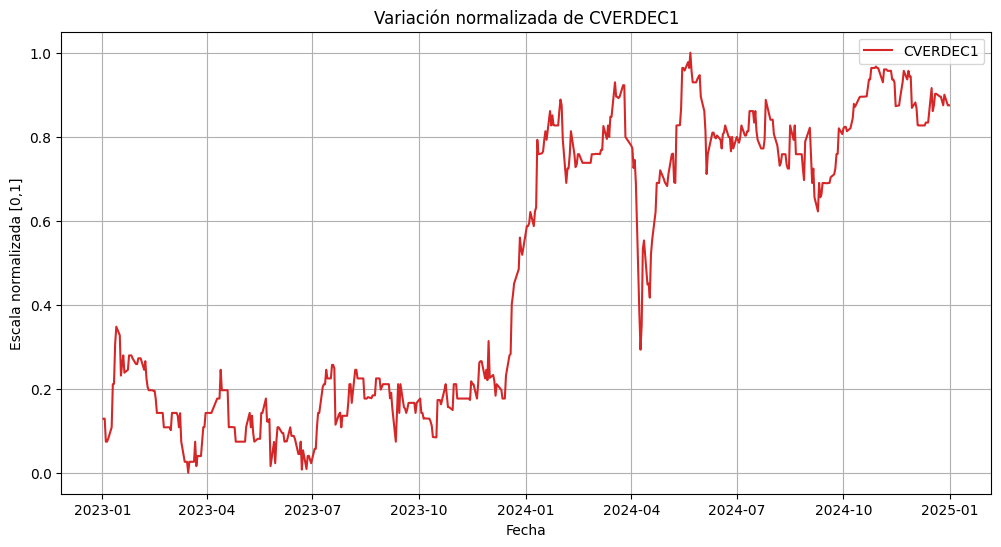

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Normalización SOLO para ploteo
data_norm = (data - data.min()) / (data.max() - data.min())

# Obtener el ciclo de colores por defecto
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, columna in enumerate(data_norm.columns):
    plt.figure(figsize=(12, 6))
    
    plt.plot(
        data_norm.index,
        data_norm[columna],
        color=color_cycle[i % len(color_cycle)],
        label=columna
    )
    
    plt.title(f"Variación normalizada de {columna}")
    plt.xlabel("Fecha")
    plt.ylabel("Escala normalizada [0,1]")
    plt.legend()
    plt.grid()
    plt.show()


## [3] CALCULO DE RENDIMIENTO (W)

Calculando los rendimientos (Wi)

                 BAP   PODERC1  CREDITC1  CVERDEC1
2023-01-03  0.000000  0.000000  0.019231  0.000000
2023-01-04  0.019372  0.000000  0.000000 -0.026846
2023-01-05  0.011605  0.000000  0.000000  0.000000
2023-01-06  0.018284  0.000000  0.011321  0.003448
2023-01-09  0.024926  0.000000  0.000000  0.013746
2023-01-10  0.017381  0.000000  0.007463  0.050847
2023-01-11  0.005267  0.063830  0.000000  0.000323
2023-01-12 -0.031302 -0.030000  0.011111  0.044824
2023-01-13  0.025310  0.000000 -0.010989  0.018519
2023-01-16  0.008522  0.000000  0.000000 -0.009091
2023-01-17 -0.014217  0.000000 -0.003704 -0.042813
2023-01-18 -0.024490  0.000000  0.000000  0.012780
2023-01-19 -0.004045  0.030928  0.003717  0.009464
2023-01-20 -0.002381  0.000000  0.033333 -0.018750
2023-01-23 -0.009896  0.000000 -0.014337  0.003185

Dimensión: (499, 4)


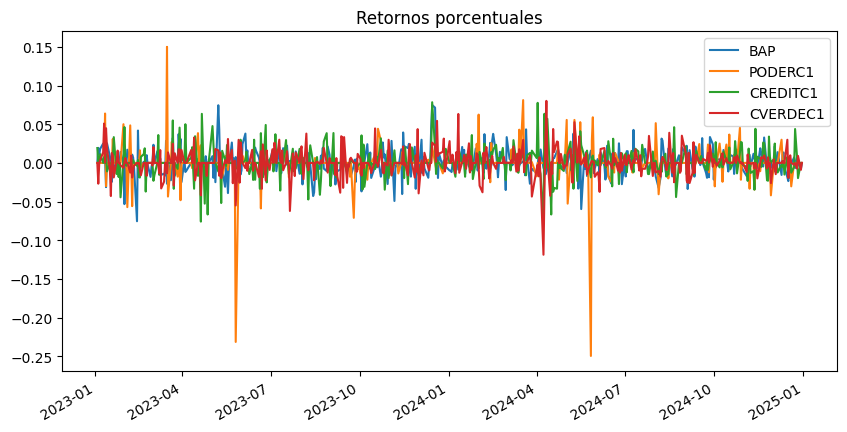

In [8]:
# CALCULO DE RENDIMIENTOS
W = data.pct_change(fill_method=None)
W = W.dropna(how="all")

# IMPRESION DE RESULTADO
print(W.head(15))
print("\nDimensión:", W.shape)

# GRAFICO DE RENDIMIENTOS
W.plot(figsize=(10, 5))
plt.title("Retornos porcentuales")
plt.show()

## [4] MATRIZ DE COVARIANZA

Estimacion de la matriz de covarianzas de los retornos

In [10]:
Q = W.cov()
print("Matriz de Covarianza de los retornos")
print(Q)

Matriz de Covarianza de los retornos
               BAP   PODERC1  CREDITC1  CVERDEC1
BAP       0.000283 -0.000013  0.000011  0.000030
PODERC1  -0.000013  0.000467  0.000022  0.000032
CREDITC1  0.000011  0.000022  0.000332  0.000034
CVERDEC1  0.000030  0.000032  0.000034  0.000274


## [5] DESCOMPOSICION CHOLESKI Y SIMULACION DE RETORNO

Simulando retornos empleando choleski

In [12]:
from numpy.random import default_rng
rng = default_rng()
L = np.linalg.cholesky(Q)
print("Descomposicion de Cholesky")
print(L)
N_muestras = 1000000
Z = rng.standard_normal(size=(N_muestras, Q.shape[1]))
W_sim = Z @ L.T
print("Simulacion de retornos")
print(W_sim)

Descomposicion de Cholesky
[[ 0.01681736  0.          0.          0.        ]
 [-0.00075347  0.02160258  0.          0.        ]
 [ 0.00065381  0.00105952  0.01818807  0.        ]
 [ 0.00177701  0.00154759  0.00172912  0.01629125]]
Simulacion de retornos
[[-0.00978718 -0.00395404  0.01105266  0.01999167]
 [ 0.00712822 -0.00631674 -0.00454186 -0.03051408]
 [ 0.00397164  0.01647877  0.02494855 -0.01215049]
 ...
 [-0.00110479 -0.00767423  0.00534569  0.00112962]
 [ 0.00222683  0.03285328  0.04317316  0.00736762]
 [ 0.01058117 -0.01548875 -0.00051784  0.00816838]]


## [6] PROYECCION PRECIO FORWARD t=90 dias

Calculando X, para t=90

In [39]:
import pandas as pd
import numpy as np

# Cargar datos (fecha ya como índice)
df = pd.read_csv(
    "datos_peru_MSCI.csv",
    index_col=0,
    parse_dates=True,
    dayfirst=True   # elimina el warning
)

# Selección de activos y ventana temporal
assets = ['BAP', 'PODERC1', 'CREDITC1', 'CVERDEC1']

#data = df[assets].iloc[-201:-1]
print(data)
prices = data[assets].copy()

# Retornos diarios
returns = data.pct_change().dropna()

# Matriz de covarianzas
Sigma = returns.cov().values

# Cholesky
L = np.linalg.cholesky(Sigma)

# Estimacion empirica del drift μ (diario)
#    μ_i ≈ (1/T) log(X_T / X_0)

X0 = prices.iloc[0].values
XT = prices.iloc[-1].values
T = len(prices) - 1   # número de días observados

mu_hat = np.log(XT / X0) / T   # drift diario empírico

# Horizonte forward: 90 días
t = 90  # días hábiles
mu_forward = mu_hat * t - 0.5 * np.diag(Sigma) * t

# Factores relativos X(t)/X(0)
X_rel = np.exp(mu_forward + np.sqrt(t) * Z @ L.T)

# Precios simulados a 90 días
X_90 = X_rel * X0

# Precio forward empirico (esperanza)
forward_empirical = X_90.mean(axis=0)

df_forward = pd.DataFrame(
    {
        "Precio inicial": X0,
        "Forward empírico 90 días": forward_empirical
    },
    index=assets
)

print(df_forward)

               BAP  PODERC1  CREDITC1  CVERDEC1
2023-01-02  135.25      9.4      2.60     29.80
2023-01-03  135.25      9.4      2.65     29.80
2023-01-04  137.87      9.4      2.65     29.00
2023-01-05  139.47      9.4      2.65     29.00
2023-01-06  142.02      9.4      2.68     29.10
...            ...      ...       ...       ...
2024-12-24  181.00      8.0      4.05     41.00
2024-12-26  182.30      8.0      4.08     40.70
2024-12-27  182.20      8.0      4.00     41.07
2024-12-30  180.85      8.0      4.00     40.70
2024-12-31  180.80      8.0      4.00     40.70

[500 rows x 4 columns]
          Precio inicial  Forward empírico 90 días
BAP               135.25                142.525864
PODERC1             9.40                  9.129694
CREDITC1            2.60                  2.810534
CVERDEC1           29.80                 31.518336


In [55]:
import pandas as pd
import numpy as np

# Cargar datos
df = pd.read_csv(
    "datos_peru_MSCI.csv",
    index_col=0,
    parse_dates=True,
    dayfirst=True
)

assets = ['BAP', 'PODERC1', 'CREDITC1', 'CVERDEC1']
#data = df[assets].dropna()

print(data)
prices = data.copy()

# Retornos logarítmicos
log_returns = np.log(prices / prices.shift(1)).dropna()

# Drift diario empírico
mu_hat = log_returns.mean().values   # μ diario

# Precio spot actual (última fecha)
S0 = prices.iloc[-1].values

# Horizonte forward
t = 90  # días hábiles

# Forward esperado
forward_90 = S0 * np.exp(mu_hat * t)

df_forward = pd.DataFrame(
    {
        "Precio spot": S0,
        "Forward esperado 90 días": forward_90
    },
    index=assets
)

print(df_forward)


               BAP  PODERC1  CREDITC1  CVERDEC1
2023-01-02  135.25      9.4      2.60     29.80
2023-01-03  135.25      9.4      2.65     29.80
2023-01-04  137.87      9.4      2.65     29.00
2023-01-05  139.47      9.4      2.65     29.00
2023-01-06  142.02      9.4      2.68     29.10
...            ...      ...       ...       ...
2024-12-24  181.00      8.0      4.05     41.00
2024-12-26  182.30      8.0      4.08     40.70
2024-12-27  182.20      8.0      4.00     41.07
2024-12-30  180.85      8.0      4.00     40.70
2024-12-31  180.80      8.0      4.00     40.70

[500 rows x 4 columns]
          Precio spot  Forward esperado 90 días
BAP             180.8                190.517514
PODERC1           8.0                  7.770660
CREDITC1          4.0                  4.323178
CVERDEC1         40.7                 43.053782


## [7] VARIABLE ALEATORIA NORMAL - VARIABLE ALEATORIA SIMULADA

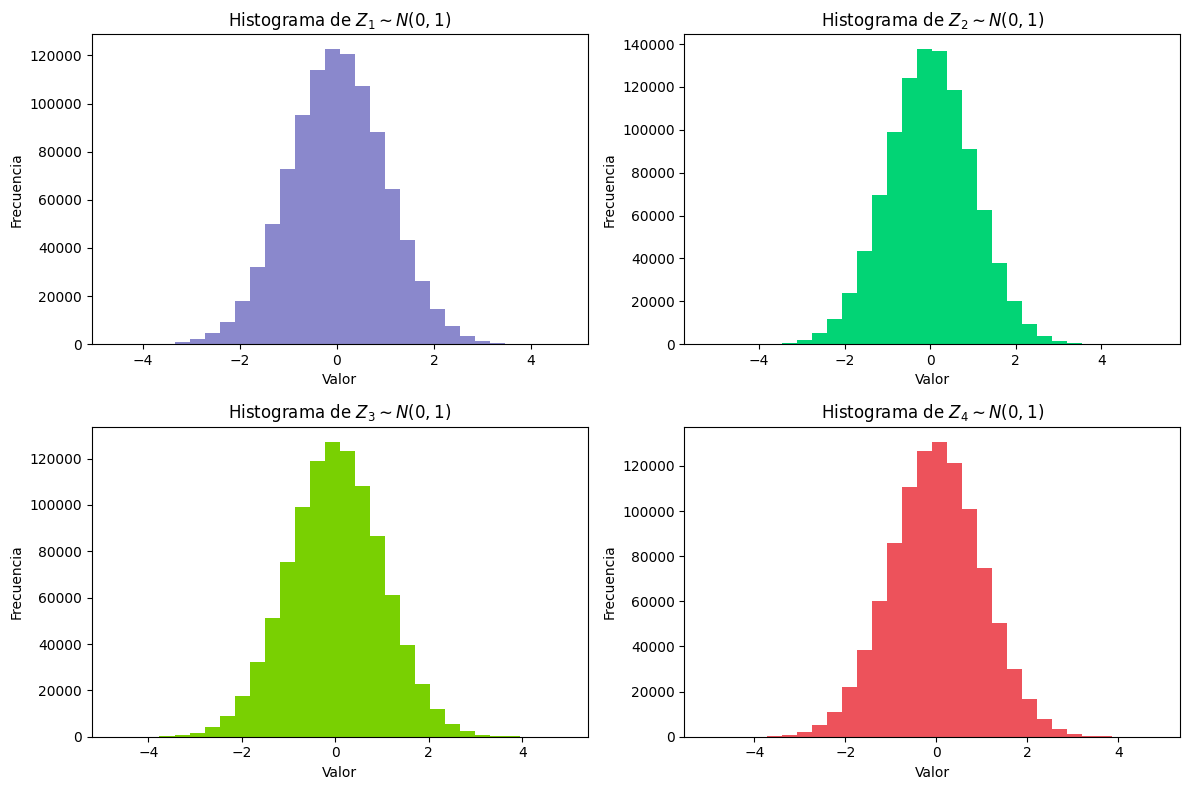

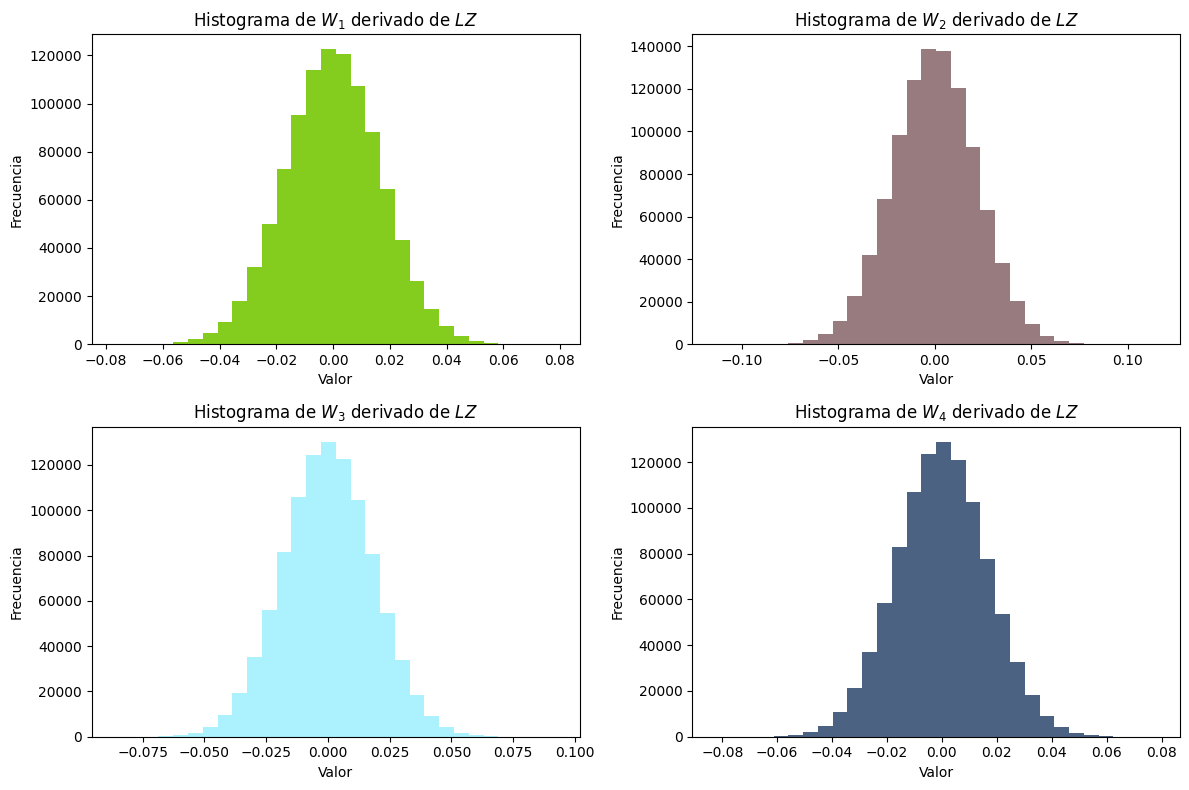

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Simulacion de variables aleatorias Normales
n_sim = 1000000
rng = np.random.default_rng(42)
Z = rng.standard_normal(size=(n_sim, len(assets)))

# W_sim ~ N(0, Sigma)
W_sim = Z @ L.T  # (n_sim, 4)

# funcion color aleatorio
def color_random():
    return (random.random(), random.random(), random.random())

# histogramas de Z_i en una sola ventana con 4 subplots (2 filas x 2 columnas)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for i in range(4):
    fila = i // 2     # 0 o 1
    col  = i % 2      # 0 o 1
    ax = axes[fila, col]
    
    ax.hist(Z[:, i], bins=30, color=color_random())
    ax.set_title(fr"Histograma de $Z_{{{i+1}}} \sim N(0,1)$")
    ax.set_xlabel("Valor")
    ax.set_ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# histogramas de X_i en una sola ventana con 4 subplots (2 filas x 2 columnas)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for i in range(4):
    fila = i // 2     # 0 o 1
    col  = i % 2      # 0 o 1
    ax = axes[fila, col]

    ax.hist(W_sim[:, i], bins=30, color=color_random())
    ax.set_title(fr"Histograma de $W_{{{i+1}}}$ derivado de $LZ$")
    ax.set_xlabel("Valor")
    ax.set_ylabel("Frecuencia")
plt.tight_layout()
plt.show()


## [8] RETORNO SIMULADOS CON PRECIO FORWARD

In [45]:

# PRECIOS FORWARD EMPIRICOS
#X_rel = np.exp(mu_forward + np.sqrt(t) * W_sim)
#X_90 = X_rel * X0
#forward_empirical = X_90.mean(axis=0)

df_forward = pd.DataFrame(
    {
        "Precio inicial": X0,
        "Forward empírico 90 días": forward_empirical
    },
    index=assets
)

# LOG-FORWARD (VECTOR NUMERICO)
log_forward = np.log(
    df_forward["Forward empírico 90 días"].values
    / df_forward["Precio inicial"].values
)

# SIMULACION FINAL DE RETORNOS
Xs = np.exp(log_forward + np.sqrt(t) * W_sim)
print("\nRetornos simulados (primeras 10 filas)")
print(Xs[:10])


Retornos simulados (primeras 10 filas)
[[1.10629236 0.78310372 1.21992337 1.2258152 ]
 [0.77191838 0.75419804 1.07759473 0.9581728 ]
 [1.05097474 0.81555993 1.24722644 1.19469244]
 [1.06495585 1.22307405 1.18562555 0.94988666]
 [1.11765235 0.79586405 1.24867912 1.05642789]
 [1.02316931 0.84585619 1.32421289 1.03989411]
 [0.98418798 0.90639315 1.1776435  1.1150313 ]
 [1.12552252 1.05777192 1.57505272 1.04254319]
 [0.9710994  0.825067   1.18861866 1.24616117]
 [1.0348112  0.81828483 0.9290894  1.13749806]]


## [9] GENERACION DE VECTOR DE PESOS C

Generando el vector C a partir de un simplex empleando una distribucion de dirichlet:

In [46]:
rng = np.random.default_rng(42)
d = 4          # dimensión del simplex
n_samples = 1100

# cada fila de samples es un vector en el simplex (suma 1, no negativo)
c = rng.dirichlet(alpha=np.ones(d), size=n_samples)
print("\nVector de Pesos C (primeras 10 filas)")
print(c[:10])


Vector de Pesos C (primeras 10 filas)
[[0.32467572 0.31549012 0.32204942 0.03778475]
 [0.01423223 0.23918586 0.23215518 0.51442673]
 [0.03469727 0.45795037 0.03082127 0.47653109]
 [0.49415935 0.11042839 0.35152195 0.04389031]
 [0.05321348 0.18314352 0.52366655 0.23997645]
 [0.27499578 0.04928912 0.40519462 0.27052047]
 [0.40903415 0.26014594 0.28274523 0.04807467]
 [0.0713438  0.27218588 0.15437052 0.5020998 ]
 [0.34576278 0.11611632 0.2250237  0.31309721]
 [0.18670295 0.17479914 0.47725434 0.16124357]]


## [10] SIMULACION DE PORTAFOLIO (Y)

Calculamos Y, valores de los portafolios para todas las simulacion y distintos valores de C.

In [47]:
Y = np.dot(Xs,c.T)
print("Impresion de la simulacion de Portafolio Y")
print(Y.shape)

Impresion de la simulacion de Portafolio Y
(1000000, 1100)


Cada columna de Y son los valores del portafolio para cada C definido, y cada fila de Y son los valores del portafolio para distintos valores de C de una solo simulacion. el numero de filas es igual al numero de simulaciones y el numero de columnas es igual al numero de C generados por el simplex. Por lo tanto se estan reusando los valores de las simulaciones para cada valor de C.

## [11] CALCULO DE MEDIA Y EXPECTED SHORTFALL

Calculando los valores de las medias y el ES(c)

In [48]:
Y_df = pd.DataFrame(Y)

p= 0.05 #5%

#N_muestras = 1000000
N = N_muestras

# Calcula cuántas observaciones caen en el peor 𝑝%
NP_entero = int(np.floor(N*p))

#Calcula la media muestral de cada columna
medias = Y_df.mean()

print("Imprision de la dimensión del vector de medias")
print(medias.shape)

print("\nImprime el numero de los peores escenarios")
print(NP_entero)

Imprision de la dimensión del vector de medias
(1100,)

Imprime el numero de los peores escenarios
50000


Ordenamos los valores de los portafolios usando QUICKSORT y calculo de ES(Y)

In [49]:
ESc = []
for col in Y_df.columns:
  vector_ordenado = np.sort(Y_df[col].to_numpy())
  ESc.append(vector_ordenado[0:NP_entero].sum(axis=0)/NP_entero)

Graficando resultados de ES(Y) vs m(Y)

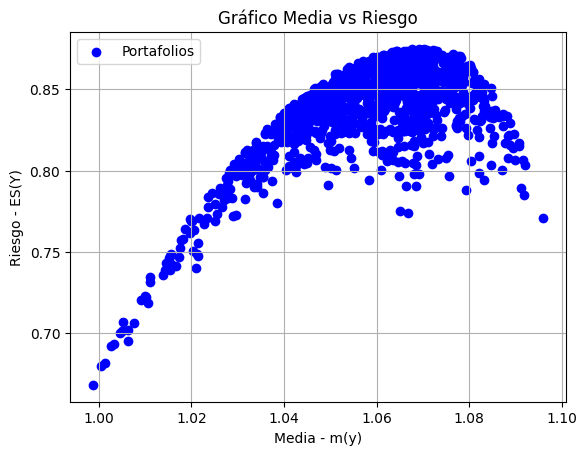

In [50]:
plt.scatter(medias, ESc, color='blue', label='Portafolios')
plt.xlabel("Media - m(y)")
plt.ylabel("Riesgo - ES(Y)")
plt.title("Gráfico Media vs Riesgo")
plt.legend()
plt.grid(True)
plt.show()

## [12] Calculando el punto optimo para un determinado "nivel de riesgo"

Normalizando los datos de medias y riesgo

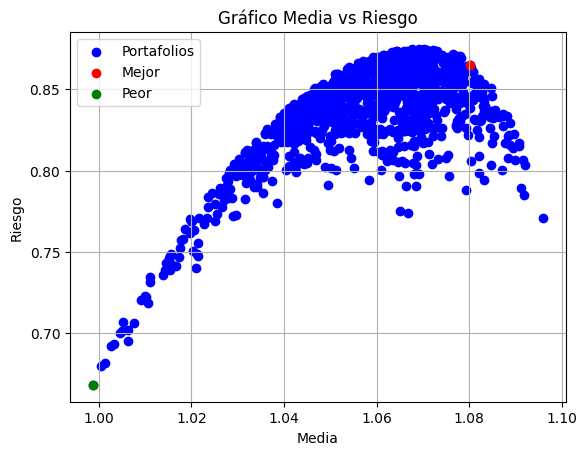

In [51]:
#Guardado los resultados de medias y riesgo en un dataframe
Resultados = pd.DataFrame({
    "Media": medias,
    "Riesgo": ESc
    }
)

#Normalizando los datos
Resultados["Media"] = (Resultados["Media"] - Resultados["Media"].mean()) / Resultados["Media"].std()
Resultados["Riesgo"] = (Resultados["Riesgo"] - Resultados["Riesgo"].mean()) / Resultados["Riesgo"].std()

#Obteniendo los mejores portafolios
m = -1.5
Resultados['Orden'] = Resultados['Riesgo']-m*Resultados['Media']
indice_max_res=np.argmax(Resultados['Orden'])

#Obteniendo los peores portafolios
m = -1.8
Resultados['Orden'] = Resultados['Riesgo']-m*Resultados['Media']
indice_min_res=np.argmin(Resultados['Orden'])

#Graficando los resultados
plt.scatter(medias, ESc, color='blue', label='Portafolios')
plt.scatter(medias[indice_max_res], ESc[indice_max_res], color='red', label='Mejor')
plt.scatter(medias[indice_min_res], ESc[indice_min_res], color='green', label='Peor')
plt.xlabel("Media")
plt.ylabel("Riesgo")
plt.title("Gráfico Media vs Riesgo")
plt.legend()
plt.grid(True)
plt.show()

In [54]:
print("Mejor portafolio:",c[indice_max_res])
print("Peor portafolio:",c[indice_min_res])

Mejor portafolio: [0.220563   0.03021779 0.46743929 0.28177992]
Peor portafolio: [0.00460196 0.92677278 0.03223137 0.03639389]


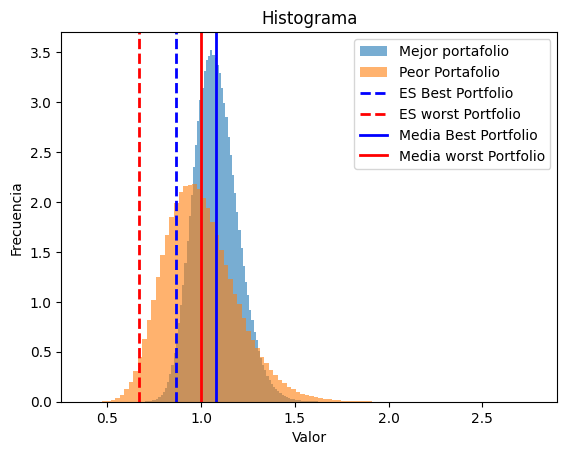

In [53]:
ES_worst=ESc[indice_min_res]
ES_best=ESc[indice_max_res]
Sim_worst=Y[:,indice_min_res]
Sim_best=Y[:,indice_max_res]

plt.hist(Sim_best, bins=100, alpha=0.6, label="Mejor portafolio", density=True)
plt.hist(Sim_worst, bins=100, alpha=0.6, label="Peor Portafolio", density=True)

plt.axvline(ES_best, color="blue", linestyle="--", linewidth=2, label="ES Best Portfolio")
plt.axvline(ES_worst, color="red", linestyle="--", linewidth=2, label="ES worst Portfolio")

plt.axvline(Sim_best.mean(), color="blue", linestyle="-", linewidth=2, label="Media Best Portfolio")
plt.axvline(Sim_worst.mean(), color="red", linestyle="-", linewidth=2, label="Media worst Portfolio")

plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.title("Histograma")
plt.legend()
plt.show()